In [46]:
# Example: remove arrow in CTP masks

In [57]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [58]:
def remove_arrow(mask_path):
    im = cv2.imread(mask_path)
    # RGB to grayscale conversion
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#     print(im_gray.shape)
    # grayscale to binary
    _, im_bw = cv2.threshold(im_gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
    # find contours
    cnts, hierarchy = cv2.findContours(im_bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # print(cnts)
    # remove small components based on area
#     may_not_arrow = []

    if cnts is not None:
        for i in range(0, len(cnts)):
            a = cv2.contourArea(cnts[i])

            if a == 49:
                cv2.drawContours(im_bw, cnts, i, 0, cv2.FILLED)
          
    return im, im_bw

In [59]:
p = './mask0820'
masks_file = os.listdir(p)
len(masks_file)

47

<ipython-input-61-42ba6b505421>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2)


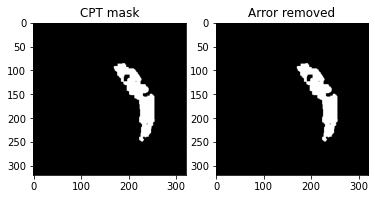

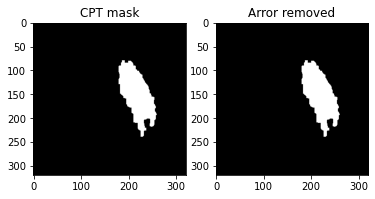

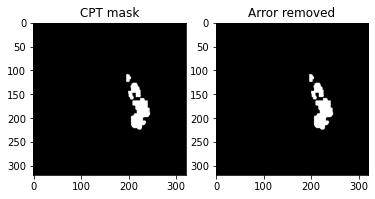

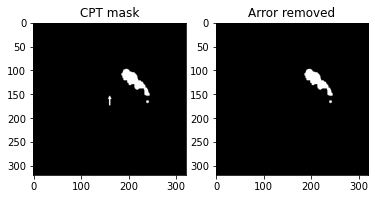

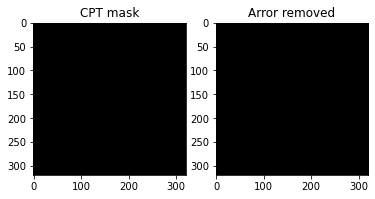

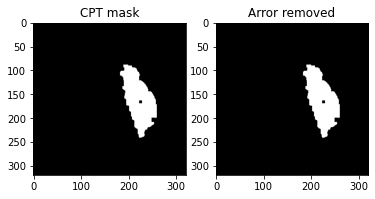

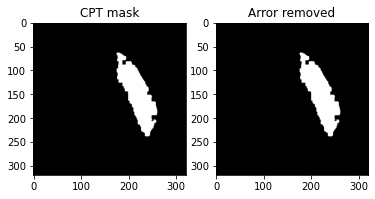

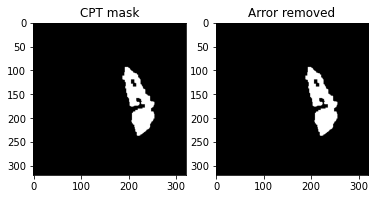

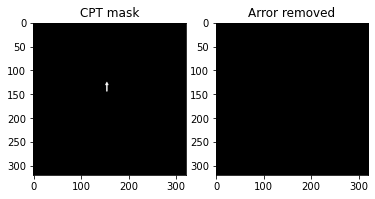

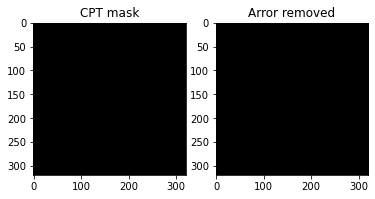

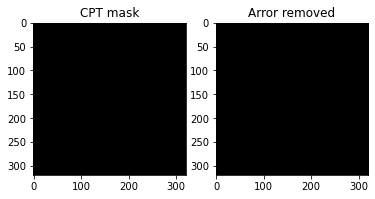

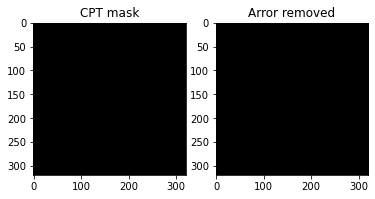

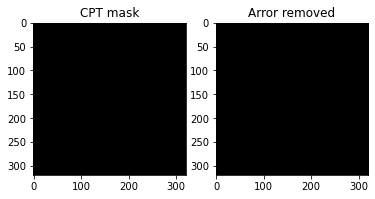

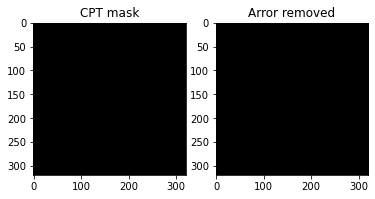

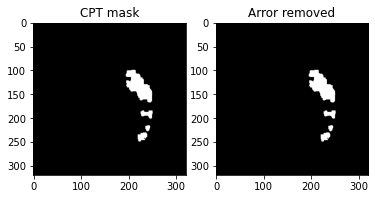

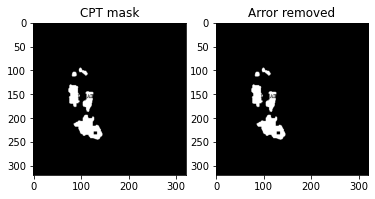

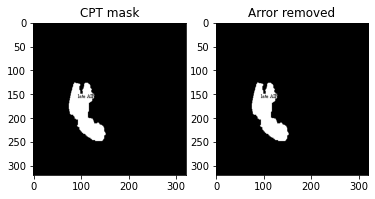

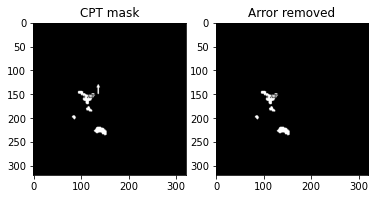

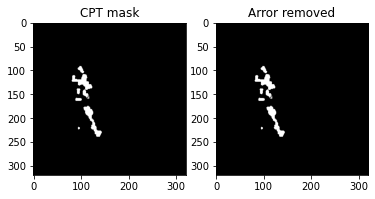

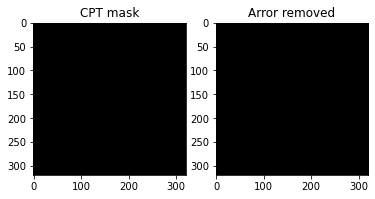

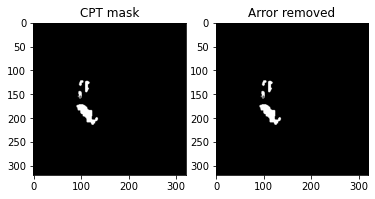

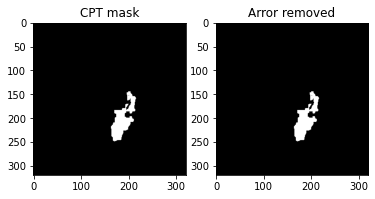

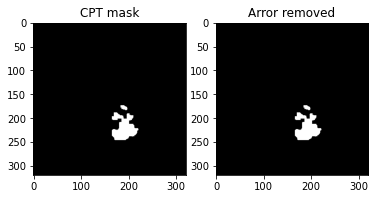

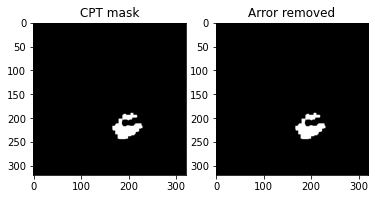

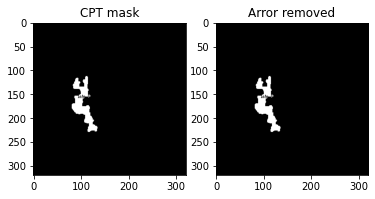

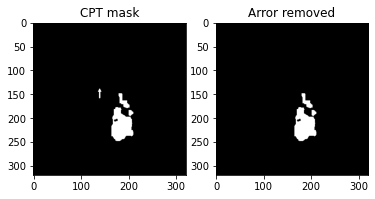

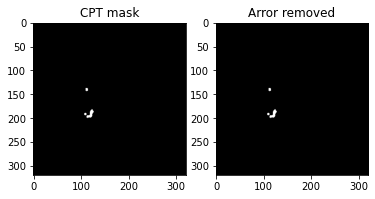

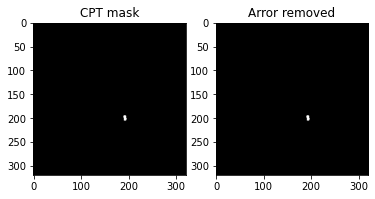

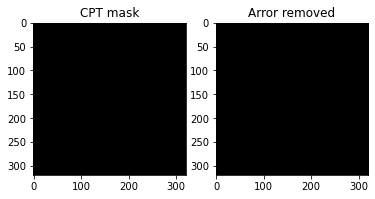

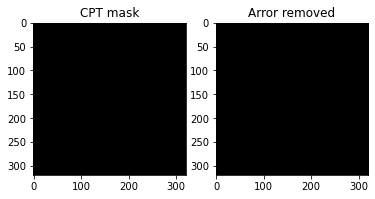

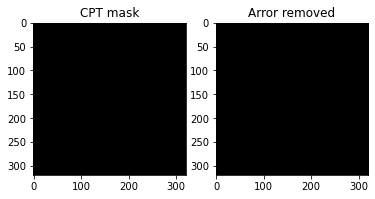

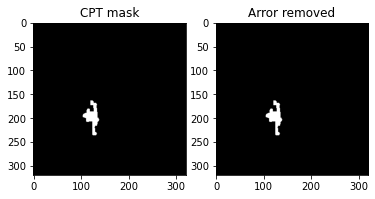

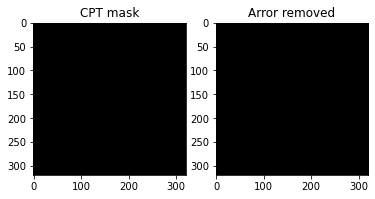

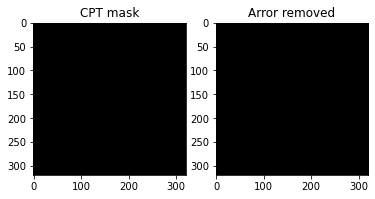

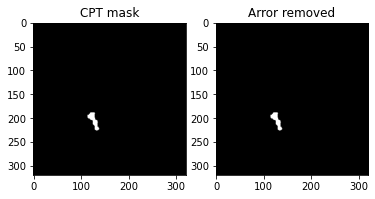

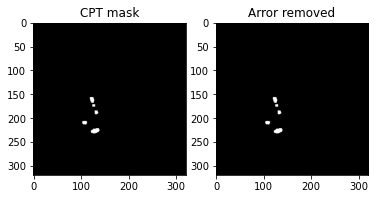

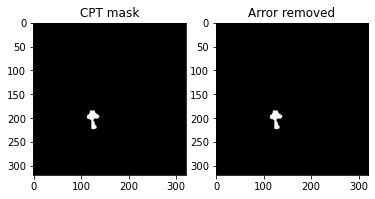

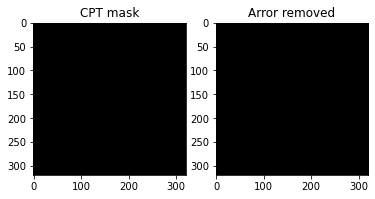

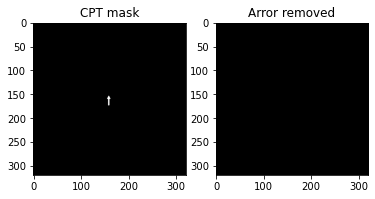

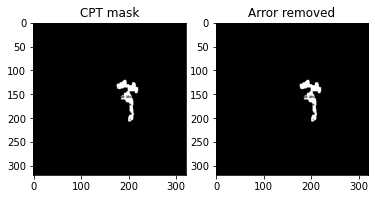

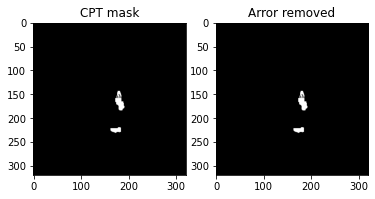

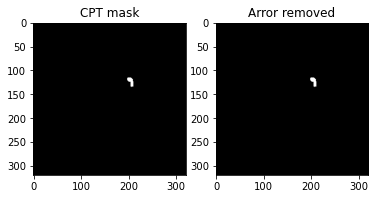

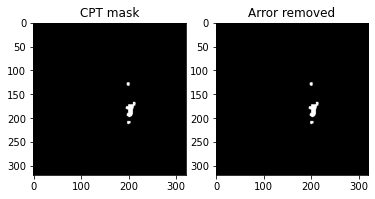

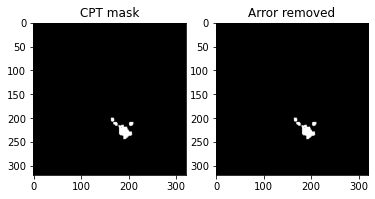

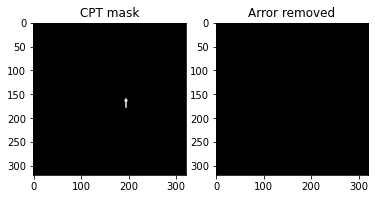

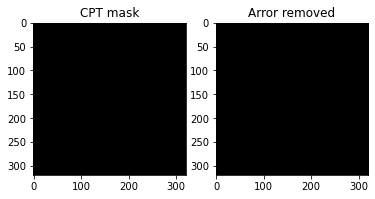

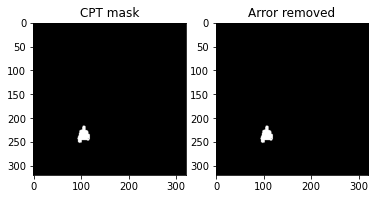

In [61]:
# Example: removing tiny arrows in CTP masks if neccessary
for f in masks_file:
    try:
#         ms = cv2.imread(f'{p}/{f}')
        fig, ax = plt.subplots(1, 2)
        ms, ms_processed = remove_arrow(f'{p}/{f}')
#         print('ms: ', type(ms), np.unique(ms), ms.shape)
#         print('ms_processed: ', type(ms_processed), np.unique(ms_processed), ms_processed.shape)
        ax[0].imshow(ms)
        ax[0].set_title('CPT mask')
        ax[1].imshow(ms_processed, cmap='gray')
        ax[1].set_title('Arror removed')
        fig.show()
#         break
    except:
        pass